In [48]:
import torch
import torchvision
from torchvision.datasets import MNIST
import pandas as pd
import numpy as np
import cv2
import os
import imutils
from PIL import Image
import keras
#from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical, plot_model,vis_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [49]:
class DataModel:
    """
            DataModel
            not used currently in the program.
    """
    def __init__(self):
        self.items_labels = None
        self.images = []
        self.curated_data = {}
    def add_image(self, image_array):
        self.images.append(image_array)
    def add_labels(self, df):
        self.item_labels = df
    def add_curated_data(self, image, emotion):
        self.curated_data['image'] = image
        self.curated_data['emotion'] = emotion



# Loads the data and returns the image and emotions in a list format
def load_data(number_of_items=10):
    """
        number_of_items -> Number of items to return
        returns the data in a dictionary of images and labels.
    """
    path = "IMFDB_FINAL"
    data = [] 
    curated_data = {"images":[], "emotions":[]}
    for actor_name in os.listdir(path)[:number_of_items]:
        # At the start of the iteration build a data model
        data_model = DataModel()
        if actor_name == ".DS_Store":
            continue
        print ("Going through actor:" + actor_name)
        for movie_folder_name in os.listdir(path+"/"+actor_name):
            print ("Goining through movie: ", movie_folder_name)
            if movie_folder_name == ".DS_Store":
                continue
            for items in os.listdir(path+"/"+actor_name+"/"+movie_folder_name):
                if items == ".DS_Store":
                    continue
                if items.endswith(".txt"):
                    print (items)
                    try:
                        print ("added")
                        df = pd.read_table(path+"/"+actor_name+"/"+movie_folder_name+"/"+items,header=None, engine="c")
                        data_model.add_labels(df) 
                        for image in os.listdir(path+"/"+actor_name+"/"+movie_folder_name+"/"+"images"):
                            print (image)
                            if image == ".DS_Store":
                                continue
                            print ("going through image: ", image)
                            for d in df.values:
                                if d[2] == image:  
                                    
                                    im = cv2.imread(path+"/"+actor_name+"/"+movie_folder_name+"/"+"images"+"/"+image)
                                    im = cv2.resize(im, (80,80)) # Changing into 80x80X3
                                    #im = cv2.resize(im, (25,25))
                                    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
                                    
                                    
                                    data_model.add_curated_data(im, d[11])
                                    curated_data['images'].append(im)
                                    curated_data['emotions'].append(d[11])  # d[11] is where the emotion is there
                    except:
                        df = None                    
            data.append(data_model) # Save all the data

    return curated_data


In [50]:
data = load_data(number_of_items=40)

Going through actor:SureshGopi
Goining through movie:  InHariharNagar
InHariharNagar.txt
added
Sureshgopi_97.jpg
going through image:  Sureshgopi_97.jpg
Sureshgopi_40.jpg
going through image:  Sureshgopi_40.jpg
Sureshgopi_54.jpg
going through image:  Sureshgopi_54.jpg
Sureshgopi_68.jpg
going through image:  Sureshgopi_68.jpg
Sureshgopi_69.jpg
going through image:  Sureshgopi_69.jpg
Sureshgopi_55.jpg
going through image:  Sureshgopi_55.jpg
Sureshgopi_41.jpg
going through image:  Sureshgopi_41.jpg
Sureshgopi_96.jpg
going through image:  Sureshgopi_96.jpg
Sureshgopi_82.jpg
going through image:  Sureshgopi_82.jpg
Sureshgopi_94.jpg
going through image:  Sureshgopi_94.jpg
Sureshgopi_80.jpg
going through image:  Sureshgopi_80.jpg
Sureshgopi_57.jpg
going through image:  Sureshgopi_57.jpg
Sureshgopi_43.jpg
going through image:  Sureshgopi_43.jpg
Sureshgopi_42.jpg
going through image:  Sureshgopi_42.jpg
Sureshgopi_56.jpg
going through image:  Sureshgopi_56.jpg
Sureshgopi_81.jpg
going through ima

SureshGopy_61.jpg
going through image:  SureshGopy_61.jpg
SureshGopy_182.jpg
going through image:  SureshGopy_182.jpg
SureshGopy_237.jpg
going through image:  SureshGopy_237.jpg
SureshGopy_223.jpg
going through image:  SureshGopy_223.jpg
SureshGopy_74.jpg
going through image:  SureshGopy_74.jpg
SureshGopy_168.jpg
going through image:  SureshGopy_168.jpg
SureshGopy_156.jpg
going through image:  SureshGopy_156.jpg
SureshGopy_76.jpg
going through image:  SureshGopy_76.jpg
SureshGopy_181.jpg
going through image:  SureshGopy_181.jpg
SureshGopy_220.jpg
going through image:  SureshGopy_220.jpg
SureshGopy_234.jpg
going through image:  SureshGopy_234.jpg
SureshGopy_235.jpg
going through image:  SureshGopy_235.jpg
SureshGopy_180.jpg
going through image:  SureshGopy_180.jpg
SureshGopy_143.jpg
going through image:  SureshGopy_143.jpg
SureshGopy_38.jpg
going through image:  SureshGopy_38.jpg
SureshGopy_252.jpg
going through image:  SureshGopy_252.jpg
SureshGopy_253.jpg
going through image:  SureshG

Simran_148.jpg
going through image:  Simran_148.jpg
Simran_45.jpg
going through image:  Simran_45.jpg
Simran_51.jpg
going through image:  Simran_51.jpg
Simran_216.jpg
going through image:  Simran_216.jpg
Simran_44.jpg
going through image:  Simran_44.jpg
Simran_149.jpg
going through image:  Simran_149.jpg
Simran_161.jpg
going through image:  Simran_161.jpg
Simran_78.jpg
going through image:  Simran_78.jpg
Simran_87.jpg
going through image:  Simran_87.jpg
Simran_97.jpg
going through image:  Simran_97.jpg
Simran_40.jpg
going through image:  Simran_40.jpg
Simran_54.jpg
going through image:  Simran_54.jpg
Simran_159.jpg
going through image:  Simran_159.jpg
Simran_171.jpg
going through image:  Simran_171.jpg
Simran_165.jpg
going through image:  Simran_165.jpg
Simran_68.jpg
going through image:  Simran_68.jpg
Simran_207.jpg
going through image:  Simran_207.jpg
Simran_212.jpg
going through image:  Simran_212.jpg
Simran_69.jpg
going through image:  Simran_69.jpg
Simran_164.jpg
going through ima

Simran_18.jpg
going through image:  Simran_18.jpg
Simran_115.jpg
going through image:  Simran_115.jpg
Simran_117.jpg
going through image:  Simran_117.jpg
Simran_103.jpg
going through image:  Simran_103.jpg
Simran_26.jpg
going through image:  Simran_26.jpg
Simran_32.jpg
going through image:  Simran_32.jpg
Simran_6.jpg
going through image:  Simran_6.jpg
Simran_7.jpg
going through image:  Simran_7.jpg
Simran_33.jpg
going through image:  Simran_33.jpg
Simran_27.jpg
going through image:  Simran_27.jpg
Simran_102.jpg
going through image:  Simran_102.jpg
Simran_116.jpg
going through image:  Simran_116.jpg
Simran_23.jpg
going through image:  Simran_23.jpg
Simran_112.jpg
going through image:  Simran_112.jpg
Simran_106.jpg
going through image:  Simran_106.jpg
Simran_3.jpg
going through image:  Simran_3.jpg
Simran_2.jpg
going through image:  Simran_2.jpg
Simran_107.jpg
going through image:  Simran_107.jpg
Simran_113.jpg
going through image:  Simran_113.jpg
Simran_36.jpg
going through image:  Simr

tenniskrishna_85.jpg
going through image:  tenniskrishna_85.jpg
tenniskrishna_91.jpg
going through image:  tenniskrishna_91.jpg
tenniskrishna_50.jpg
going through image:  tenniskrishna_50.jpg
tenniskrishna_87.jpg
going through image:  tenniskrishna_87.jpg
tenniskrishna_93.jpg
going through image:  tenniskrishna_93.jpg
tenniskrishna_121.jpg
going through image:  tenniskrishna_121.jpg
tenniskrishna_135.jpg
going through image:  tenniskrishna_135.jpg
tenniskrishna_120.jpg
going through image:  tenniskrishna_120.jpg
tenniskrishna_51.jpg
going through image:  tenniskrishna_51.jpg
tenniskrishna_79.jpg
going through image:  tenniskrishna_79.jpg
tenniskrishna_60.jpg
going through image:  tenniskrishna_60.jpg
tenniskrishna_74.jpg
going through image:  tenniskrishna_74.jpg
tenniskrishna_139.jpg
going through image:  tenniskrishna_139.jpg
tenniskrishna_105.jpg
going through image:  tenniskrishna_105.jpg
tenniskrishna_111.jpg
going through image:  tenniskrishna_111.jpg
tenniskrishna_110.jpg
going 

Madhu_26.jpg
going through image:  Madhu_26.jpg
Madhu_24.jpg
going through image:  Madhu_24.jpg
Madhu_100.jpg
going through image:  Madhu_100.jpg
Madhu_56.jpg
going through image:  Madhu_56.jpg
Madhu_81.jpg
going through image:  Madhu_81.jpg
Madhu_94.jpg
going through image:  Madhu_94.jpg
Madhu_115.jpg
going through image:  Madhu_115.jpg
Madhu_103.jpg
going through image:  Madhu_103.jpg
Madhu_55.jpg
going through image:  Madhu_55.jpg
Madhu_96.jpg
going through image:  Madhu_96.jpg
Madhu_83.jpg
going through image:  Madhu_83.jpg
Madhu_97.jpg
going through image:  Madhu_97.jpg
Madhu_50.jpg
going through image:  Madhu_50.jpg
Madhu_92.jpg
going through image:  Madhu_92.jpg
Madhu_45.jpg
going through image:  Madhu_45.jpg
Madhu_113.jpg
going through image:  Madhu_113.jpg
Madhu_107.jpg
going through image:  Madhu_107.jpg
Madhu_105.jpg
going through image:  Madhu_105.jpg
Madhu_53.jpg
going through image:  Madhu_53.jpg
Madhu_90.jpg
going through image:  Madhu_90.jpg
Madhu_46.jpg
going through i

Going through actor:KarunaBenerjee
Goining through movie:  .DS_Store
Goining through movie:  kanchenjhenga
kanchenjhenga.txt
added
KarunaBenerjee_19.jpg
going through image:  KarunaBenerjee_19.jpg
KarunaBenerjee_18.jpg
going through image:  KarunaBenerjee_18.jpg
KarunaBenerjee_20.jpg
going through image:  KarunaBenerjee_20.jpg
KarunaBenerjee_2.jpg
going through image:  KarunaBenerjee_2.jpg
KarunaBenerjee_3.jpg
going through image:  KarunaBenerjee_3.jpg
KarunaBenerjee_1.jpg
going through image:  KarunaBenerjee_1.jpg
KarunaBenerjee_4.jpg
going through image:  KarunaBenerjee_4.jpg
KarunaBenerjee_5.jpg
going through image:  KarunaBenerjee_5.jpg
KarunaBenerjee_7.jpg
going through image:  KarunaBenerjee_7.jpg
KarunaBenerjee_6.jpg
going through image:  KarunaBenerjee_6.jpg
KarunaBenerjee_8.jpg
going through image:  KarunaBenerjee_8.jpg
KarunaBenerjee_9.jpg
going through image:  KarunaBenerjee_9.jpg
KarunaBenerjee_13.jpg
going through image:  KarunaBenerjee_13.jpg
KarunaBenerjee_12.jpg
going t

KarunaBenerjee_98.jpg
going through image:  KarunaBenerjee_98.jpg
KarunaBenerjee_118.jpg
going through image:  KarunaBenerjee_118.jpg
KarunaBenerjee_124.jpg
going through image:  KarunaBenerjee_124.jpg
KarunaBenerjee_67.jpg
going through image:  KarunaBenerjee_67.jpg
KarunaBenerjee_73.jpg
going through image:  KarunaBenerjee_73.jpg
KarunaBenerjee_130.jpg
going through image:  KarunaBenerjee_130.jpg
KarunaBenerjee_8.jpg
going through image:  KarunaBenerjee_8.jpg
KarunaBenerjee_9.jpg
going through image:  KarunaBenerjee_9.jpg
KarunaBenerjee_72.jpg
going through image:  KarunaBenerjee_72.jpg
KarunaBenerjee_125.jpg
going through image:  KarunaBenerjee_125.jpg
KarunaBenerjee_66.jpg
going through image:  KarunaBenerjee_66.jpg
KarunaBenerjee_119.jpg
going through image:  KarunaBenerjee_119.jpg
KarunaBenerjee_99.jpg
going through image:  KarunaBenerjee_99.jpg
KarunaBenerjee_89.jpg
going through image:  KarunaBenerjee_89.jpg
KarunaBenerjee_62.jpg
going through image:  KarunaBenerjee_62.jpg
Karu

KatrinaKaif_73.jpg
going through image:  KatrinaKaif_73.jpg
KatrinaKaif_67.jpg
going through image:  KatrinaKaif_67.jpg
KatrinaKaif_77.jpg
going through image:  KatrinaKaif_77.jpg
KatrinaKaif_89.jpg
going through image:  KatrinaKaif_89.jpg
KatrinaKaif_76.jpg
going through image:  KatrinaKaif_76.jpg
KatrinaKaif_62.jpg
going through image:  KatrinaKaif_62.jpg
KatrinaKaif_1.jpg
going through image:  KatrinaKaif_1.jpg
KatrinaKaif_60.jpg
going through image:  KatrinaKaif_60.jpg
KatrinaKaif_48.jpg
going through image:  KatrinaKaif_48.jpg
KatrinaKaif_49.jpg
going through image:  KatrinaKaif_49.jpg
KatrinaKaif_75.jpg
going through image:  KatrinaKaif_75.jpg
Goining through movie:  TeesMaarKhan
TeesMaarKhan.txt
added
KatrinaKaif_50.jpg
going through image:  KatrinaKaif_50.jpg
KatrinaKaif_44.jpg
going through image:  KatrinaKaif_44.jpg
KatrinaKaif_45.jpg
going through image:  KatrinaKaif_45.jpg
KatrinaKaif_51.jpg
going through image:  KatrinaKaif_51.jpg
KatrinaKaif_53.jpg
going through image:  K

going through image:  Katrinakaif_181.jpg
Katrinakaif_194.jpg
going through image:  Katrinakaif_194.jpg
Katrinakaif_180.jpg
going through image:  Katrinakaif_180.jpg
Katrinakaif_157.jpg
going through image:  Katrinakaif_157.jpg
Katrinakaif_143.jpg
going through image:  Katrinakaif_143.jpg
Katrinakaif_83.jpg
going through image:  Katrinakaif_83.jpg
Katrinakaif_40.jpg
going through image:  Katrinakaif_40.jpg
Katrinakaif_209.jpg
going through image:  Katrinakaif_209.jpg
Katrinakaif_221.jpg
going through image:  Katrinakaif_221.jpg
Katrinakaif_235.jpg
going through image:  Katrinakaif_235.jpg
Katrinakaif_285.jpg
going through image:  Katrinakaif_285.jpg
Katrinakaif_33.jpg
going through image:  Katrinakaif_33.jpg
Katrinakaif_118.jpg
going through image:  Katrinakaif_118.jpg
Katrinakaif_124.jpg
going through image:  Katrinakaif_124.jpg
Katrinakaif_130.jpg
going through image:  Katrinakaif_130.jpg
Katrinakaif_131.jpg
going through image:  Katrinakaif_131.jpg
Katrinakaif_125.jpg
going through 

SVR_207.jpg
going through image:  SVR_207.jpg
SVR_159.jpg
going through image:  SVR_159.jpg
SVR_171.jpg
going through image:  SVR_171.jpg
SVR_165.jpg
going through image:  SVR_165.jpg
SVR_173.jpg
going through image:  SVR_173.jpg
SVR_167.jpg
going through image:  SVR_167.jpg
SVR_198.jpg
going through image:  SVR_198.jpg
SVR_205.jpg
going through image:  SVR_205.jpg
SVR_211.jpg
going through image:  SVR_211.jpg
SVR_23.jpg
going through image:  SVR_23.jpg
SVR_37.jpg
going through image:  SVR_37.jpg
SVR_36.jpg
going through image:  SVR_36.jpg
SVR_210.jpg
going through image:  SVR_210.jpg
SVR_204.jpg
going through image:  SVR_204.jpg
SVR_199.jpg
going through image:  SVR_199.jpg
SVR_166.jpg
going through image:  SVR_166.jpg
SVR_172.jpg
going through image:  SVR_172.jpg
SVR_176.jpg
going through image:  SVR_176.jpg
SVR_162.jpg
going through image:  SVR_162.jpg
SVR_189.jpg
going through image:  SVR_189.jpg
SVR_200.jpg
going through image:  SVR_200.jpg
SVR_32.jpg
going through image:  SVR_32.

SVR_125.jpg
going through image:  SVR_125.jpg
SVR_119.jpg
going through image:  SVR_119.jpg
SVR_49.jpg
going through image:  SVR_49.jpg
SVR_61.jpg
going through image:  SVR_61.jpg
SVR_75.jpg
going through image:  SVR_75.jpg
SVR_74.jpg
going through image:  SVR_74.jpg
SVR_60.jpg
going through image:  SVR_60.jpg
SVR_48.jpg
going through image:  SVR_48.jpg
SVR_118.jpg
going through image:  SVR_118.jpg
SVR_124.jpg
going through image:  SVR_124.jpg
SVR_130.jpg
going through image:  SVR_130.jpg
SVR_108.jpg
going through image:  SVR_108.jpg
SVR_134.jpg
going through image:  SVR_134.jpg
SVR_64.jpg
going through image:  SVR_64.jpg
SVR_70.jpg
going through image:  SVR_70.jpg
SVR_58.jpg
going through image:  SVR_58.jpg
SVR_65.jpg
going through image:  SVR_65.jpg
SVR_121.jpg
going through image:  SVR_121.jpg
SVR_135.jpg
going through image:  SVR_135.jpg
SVR_109.jpg
going through image:  SVR_109.jpg
SVR_123.jpg
going through image:  SVR_123.jpg
SVR_137.jpg
going through image:  SVR_137.jpg
SVR_73.j

BhanuPriya_40.jpg
going through image:  BhanuPriya_40.jpg
BhanuPriya_54.jpg
going through image:  BhanuPriya_54.jpg
BhanuPriya_117.jpg
going through image:  BhanuPriya_117.jpg
BhanuPriya_103.jpg
going through image:  BhanuPriya_103.jpg
BhanuPriya_3.jpg
going through image:  BhanuPriya_3.jpg
BhanuPriya_1.jpg
going through image:  BhanuPriya_1.jpg
BhanuPriya_115.jpg
going through image:  BhanuPriya_115.jpg
BhanuPriya_101.jpg
going through image:  BhanuPriya_101.jpg
BhanuPriya_129.jpg
going through image:  BhanuPriya_129.jpg
BhanuPriya_42.jpg
going through image:  BhanuPriya_42.jpg
BhanuPriya_56.jpg
going through image:  BhanuPriya_56.jpg
BhanuPriya_81.jpg
going through image:  BhanuPriya_81.jpg
BhanuPriya_95.jpg
going through image:  BhanuPriya_95.jpg
BhanuPriya_94.jpg
going through image:  BhanuPriya_94.jpg
BhanuPriya_80.jpg
going through image:  BhanuPriya_80.jpg
BhanuPriya_57.jpg
going through image:  BhanuPriya_57.jpg
BhanuPriya_100.jpg
going through image:  BhanuPriya_100.jpg
BhanuP

ANR_106.jpg
going through image:  ANR_106.jpg
ANR_3.jpg
going through image:  ANR_3.jpg
ANR_107.jpg
going through image:  ANR_107.jpg
ANR_113.jpg
going through image:  ANR_113.jpg
ANR_12.jpg
going through image:  ANR_12.jpg
ANR_37.jpg
going through image:  ANR_37.jpg
ANR_136.jpg
going through image:  ANR_136.jpg
ANR_122.jpg
going through image:  ANR_122.jpg
ANR_123.jpg
going through image:  ANR_123.jpg
ANR_137.jpg
going through image:  ANR_137.jpg
ANR_121.jpg
going through image:  ANR_121.jpg
ANR_135.jpg
going through image:  ANR_135.jpg
ANR_35.jpg
going through image:  ANR_35.jpg
ANR_134.jpg
going through image:  ANR_134.jpg
ANR_120.jpg
going through image:  ANR_120.jpg
ANR_130.jpg
going through image:  ANR_130.jpg
ANR_118.jpg
going through image:  ANR_118.jpg
ANR_30.jpg
going through image:  ANR_30.jpg
ANR_131.jpg
going through image:  ANR_131.jpg
ANR_125.jpg
going through image:  ANR_125.jpg
ANR_133.jpg
going through image:  ANR_133.jpg
ANR_127.jpg
going through image:  ANR_127.jpg


ANR_118.jpg
going through image:  ANR_118.jpg
ANR_18.jpg
going through image:  ANR_18.jpg
ANR_30.jpg
going through image:  ANR_30.jpg
ANR_125.jpg
going through image:  ANR_125.jpg
ANR_133.jpg
going through image:  ANR_133.jpg
ANR_127.jpg
going through image:  ANR_127.jpg
ANR_132.jpg
going through image:  ANR_132.jpg
ANR_33.jpg
going through image:  ANR_33.jpg
ANR_68.jpg
going through image:  ANR_68.jpg
ANR_169.jpg
going through image:  ANR_169.jpg
ANR_141.jpg
going through image:  ANR_141.jpg
ANR_83.jpg
going through image:  ANR_83.jpg
ANR_96.jpg
going through image:  ANR_96.jpg
ANR_41.jpg
going through image:  ANR_41.jpg
ANR_140.jpg
going through image:  ANR_140.jpg
ANR_154.jpg
going through image:  ANR_154.jpg
ANR_168.jpg
going through image:  ANR_168.jpg
ANR_57.jpg
going through image:  ANR_57.jpg
ANR_95.jpg
going through image:  ANR_95.jpg
ANR_81.jpg
going through image:  ANR_81.jpg
ANR_157.jpg
going through image:  ANR_157.jpg
ANR_143.jpg
going through image:  ANR_143.jpg
ANR_42.j

Umashri_3.jpg
going through image:  Umashri_3.jpg
Umashri_16.jpg
going through image:  Umashri_16.jpg
Umashri_27.jpg
going through image:  Umashri_27.jpg
Umashri_33.jpg
going through image:  Umashri_33.jpg
Umashri_32.jpg
going through image:  Umashri_32.jpg
Umashri_26.jpg
going through image:  Umashri_26.jpg
Umashri_30.jpg
going through image:  Umashri_30.jpg
Umashri_24.jpg
going through image:  Umashri_24.jpg
Umashri_18.jpg
going through image:  Umashri_18.jpg
Umashri_19.jpg
going through image:  Umashri_19.jpg
Umashri_25.jpg
going through image:  Umashri_25.jpg
Umashri_31.jpg
going through image:  Umashri_31.jpg
Umashri_35.jpg
going through image:  Umashri_35.jpg
Umashri_21.jpg
going through image:  Umashri_21.jpg
Umashri_8.jpg
going through image:  Umashri_8.jpg
Umashri_9.jpg
going through image:  Umashri_9.jpg
Umashri_20.jpg
going through image:  Umashri_20.jpg
Umashri_34.jpg
going through image:  Umashri_34.jpg
Umashri_22.jpg
going through image:  Umashri_22.jpg
Umashri_36.jpg
goi

Jagadeesh_72.jpg
going through image:  Jagadeesh_72.jpg
Jagadeesh_123.jpg
going through image:  Jagadeesh_123.jpg
Jagadeesh_137.jpg
going through image:  Jagadeesh_137.jpg
Jagadeesh_136.jpg
going through image:  Jagadeesh_136.jpg
Jagadeesh_122.jpg
going through image:  Jagadeesh_122.jpg
Jagadeesh_98.jpg
going through image:  Jagadeesh_98.jpg
Jagadeesh_73.jpg
going through image:  Jagadeesh_73.jpg
Jagadeesh_67.jpg
going through image:  Jagadeesh_67.jpg
Jagadeesh_240.jpg
going through image:  Jagadeesh_240.jpg
Jagadeesh_254.jpg
going through image:  Jagadeesh_254.jpg
Jagadeesh_233.jpg
going through image:  Jagadeesh_233.jpg
Jagadeesh_227.jpg
going through image:  Jagadeesh_227.jpg
Jagadeesh_14.jpg
going through image:  Jagadeesh_14.jpg
Jagadeesh_186.jpg
going through image:  Jagadeesh_186.jpg
Jagadeesh_192.jpg
going through image:  Jagadeesh_192.jpg
Jagadeesh_151.jpg
going through image:  Jagadeesh_151.jpg
Jagadeesh_150.jpg
going through image:  Jagadeesh_150.jpg
Jagadeesh_144.jpg
going 

Jagadeesh_129.jpg
going through image:  Jagadeesh_129.jpg
Jagadeesh_100.jpg
going through image:  Jagadeesh_100.jpg
Jagadeesh_86.jpg
going through image:  Jagadeesh_86.jpg
Jagadeesh_9.jpg
going through image:  Jagadeesh_9.jpg
Jagadeesh_92.jpg
going through image:  Jagadeesh_92.jpg
Jagadeesh_45.jpg
going through image:  Jagadeesh_45.jpg
Jagadeesh_51.jpg
going through image:  Jagadeesh_51.jpg
Jagadeesh_79.jpg
going through image:  Jagadeesh_79.jpg
Jagadeesh_260.jpg
going through image:  Jagadeesh_260.jpg
Jagadeesh_248.jpg
going through image:  Jagadeesh_248.jpg
Jagadeesh_53.jpg
going through image:  Jagadeesh_53.jpg
Jagadeesh_84.jpg
going through image:  Jagadeesh_84.jpg
Jagadeesh_90.jpg
going through image:  Jagadeesh_90.jpg
Jagadeesh_102.jpg
going through image:  Jagadeesh_102.jpg
Jagadeesh_116.jpg
going through image:  Jagadeesh_116.jpg
Jagadeesh_117.jpg
going through image:  Jagadeesh_117.jpg
Jagadeesh_91.jpg
going through image:  Jagadeesh_91.jpg
Jagadeesh_85.jpg
going through image

Jagadeesh_67.jpg
going through image:  Jagadeesh_67.jpg
Jagadeesh_14.jpg
going through image:  Jagadeesh_14.jpg
Jagadeesh_29.jpg
going through image:  Jagadeesh_29.jpg
Jagadeesh_16.jpg
going through image:  Jagadeesh_16.jpg
Jagadeesh_13.jpg
going through image:  Jagadeesh_13.jpg
Jagadeesh_39.jpg
going through image:  Jagadeesh_39.jpg
Jagadeesh_36.jpg
going through image:  Jagadeesh_36.jpg
Jagadeesh_22.jpg
going through image:  Jagadeesh_22.jpg
Jagadeesh_18.jpg
going through image:  Jagadeesh_18.jpg
Jagadeesh_24.jpg
going through image:  Jagadeesh_24.jpg
Jagadeesh_25.jpg
going through image:  Jagadeesh_25.jpg
Jagadeesh_42.jpg
going through image:  Jagadeesh_42.jpg
Jagadeesh_43.jpg
going through image:  Jagadeesh_43.jpg
Jagadeesh_55.jpg
going through image:  Jagadeesh_55.jpg
Jagadeesh_40.jpg
going through image:  Jagadeesh_40.jpg
Jagadeesh_8.jpg
going through image:  Jagadeesh_8.jpg
Jagadeesh_9.jpg
going through image:  Jagadeesh_9.jpg
Jagadeesh_45.jpg
going through image:  Jagadeesh_45.

SharukhKhan_68.jpg
going through image:  SharukhKhan_68.jpg
SharukhKhan_54.jpg
going through image:  SharukhKhan_54.jpg
SharukhKhan_40.jpg
going through image:  SharukhKhan_40.jpg
SharukhKhan_103.jpg
going through image:  SharukhKhan_103.jpg
SharukhKhan_129.jpg
going through image:  SharukhKhan_129.jpg
SharukhKhan_56.jpg
going through image:  SharukhKhan_56.jpg
SharukhKhan_42.jpg
going through image:  SharukhKhan_42.jpg
SharukhKhan_95.jpg
going through image:  SharukhKhan_95.jpg
SharukhKhan_81.jpg
going through image:  SharukhKhan_81.jpg
SharukhKhan_94.jpg
going through image:  SharukhKhan_94.jpg
SharukhKhan_43.jpg
going through image:  SharukhKhan_43.jpg
SharukhKhan_57.jpg
going through image:  SharukhKhan_57.jpg
SharukhKhan_128.jpg
going through image:  SharukhKhan_128.jpg
SharukhKhan_114.jpg
going through image:  SharukhKhan_114.jpg
SharukhKhan_110.jpg
going through image:  SharukhKhan_110.jpg
SharukhKhan_104.jpg
going through image:  SharukhKhan_104.jpg
SharukhKhan_84.jpg
going thr

SharukhKhan_13.jpg
going through image:  SharukhKhan_13.jpg
SharukhKhan_150.jpg
going through image:  SharukhKhan_150.jpg
SharukhKhan_144.jpg
going through image:  SharukhKhan_144.jpg
SharukhKhan_178.jpg
going through image:  SharukhKhan_178.jpg
SharukhKhan_6.jpg
going through image:  SharukhKhan_6.jpg
SharukhKhan_193.jpg
going through image:  SharukhKhan_193.jpg
SharukhKhan_187.jpg
going through image:  SharukhKhan_187.jpg
SharukhKhan_226.jpg
going through image:  SharukhKhan_226.jpg
SharukhKhan_232.jpg
going through image:  SharukhKhan_232.jpg
SharukhKhan_217.jpg
going through image:  SharukhKhan_217.jpg
SharukhKhan_203.jpg
going through image:  SharukhKhan_203.jpg
SharukhKhan_161.jpg
going through image:  SharukhKhan_161.jpg
SharukhKhan_149.jpg
going through image:  SharukhKhan_149.jpg
SharukhKhan_22.jpg
going through image:  SharukhKhan_22.jpg
SharukhKhan_36.jpg
going through image:  SharukhKhan_36.jpg
SharukhKhan_37.jpg
going through image:  SharukhKhan_37.jpg
SharukhKhan_23.jpg
g

ShahRukhKhan_1.jpg
going through image:  ShahRukhKhan_1.jpg
ShahRukhKhan_5.jpg
going through image:  ShahRukhKhan_5.jpg
ShahRukhKhan_4.jpg
going through image:  ShahRukhKhan_4.jpg
ShahRukhKhan_6.jpg
going through image:  ShahRukhKhan_6.jpg
ShahRukhKhan_7.jpg
going through image:  ShahRukhKhan_7.jpg
ShahRukhKhan_9.jpg
going through image:  ShahRukhKhan_9.jpg
ShahRukhKhan_8.jpg
going through image:  ShahRukhKhan_8.jpg
ShahRukhKhan_20.jpg
going through image:  ShahRukhKhan_20.jpg
ShahRukhKhan_21.jpg
going through image:  ShahRukhKhan_21.jpg
ShahRukhKhan_23.jpg
going through image:  ShahRukhKhan_23.jpg
ShahRukhKhan_22.jpg
going through image:  ShahRukhKhan_22.jpg
ShahRukhKhan_26.jpg
going through image:  ShahRukhKhan_26.jpg
ShahRukhKhan_27.jpg
going through image:  ShahRukhKhan_27.jpg
ShahRukhKhan_31.jpg
going through image:  ShahRukhKhan_31.jpg
ShahRukhKhan_25.jpg
going through image:  ShahRukhKhan_25.jpg
ShahRukhKhan_19.jpg
going through image:  ShahRukhKhan_19.jpg
ShahRukhKhan_18.jpg
go

NTR_118.jpg
going through image:  NTR_118.jpg
NTR_130.jpg
going through image:  NTR_130.jpg
NTR_124.jpg
going through image:  NTR_124.jpg
NTR_19.jpg
going through image:  NTR_19.jpg
NTR_125.jpg
going through image:  NTR_125.jpg
NTR_131.jpg
going through image:  NTR_131.jpg
NTR_4.jpg
going through image:  NTR_4.jpg
NTR_109.jpg
going through image:  NTR_109.jpg
NTR_21.jpg
going through image:  NTR_21.jpg
NTR_20.jpg
going through image:  NTR_20.jpg
NTR_108.jpg
going through image:  NTR_108.jpg
NTR_120.jpg
going through image:  NTR_120.jpg
NTR_134.jpg
going through image:  NTR_134.jpg
NTR_1.jpg
going through image:  NTR_1.jpg
NTR_122.jpg
going through image:  NTR_122.jpg
NTR_136.jpg
going through image:  NTR_136.jpg
NTR_36.jpg
going through image:  NTR_36.jpg
NTR_123.jpg
going through image:  NTR_123.jpg
NTR_2.jpg
going through image:  NTR_2.jpg
Going through actor:SalmanKhan
Goining through movie:  .DS_Store
Goining through movie:  KuchKuchhotahai
KuchKuchhotahai.txt
added
SalmanKhan_103.

SalmanKhan_46.jpg
going through image:  SalmanKhan_46.jpg
SalmanKhan_91.jpg
going through image:  SalmanKhan_91.jpg
SalmanKhan_85.jpg
going through image:  SalmanKhan_85.jpg
SalmanKhan_84.jpg
going through image:  SalmanKhan_84.jpg
SalmanKhan_90.jpg
going through image:  SalmanKhan_90.jpg
SalmanKhan_47.jpg
going through image:  SalmanKhan_47.jpg
SalmanKhan_53.jpg
going through image:  SalmanKhan_53.jpg
SalmanKhan_9.jpg
going through image:  SalmanKhan_9.jpg
SalmanKhan_34.jpg
going through image:  SalmanKhan_34.jpg
SalmanKhan_20.jpg
going through image:  SalmanKhan_20.jpg
SalmanKhan_21.jpg
going through image:  SalmanKhan_21.jpg
SalmanKhan_35.jpg
going through image:  SalmanKhan_35.jpg
SalmanKhan_8.jpg
going through image:  SalmanKhan_8.jpg
SalmanKhan_23.jpg
going through image:  SalmanKhan_23.jpg
SalmanKhan_37.jpg
going through image:  SalmanKhan_37.jpg
SalmanKhan_36.jpg
going through image:  SalmanKhan_36.jpg
SalmanKhan_22.jpg
going through image:  SalmanKhan_22.jpg
SalmanKhan_26.jpg


JAMUNA_271.jpg
going through image:  JAMUNA_271.jpg
JAMUNA_265.jpg
going through image:  JAMUNA_265.jpg
JAMUNA_77.jpg
going through image:  JAMUNA_77.jpg
JAMUNA_273.jpg
going through image:  JAMUNA_273.jpg
JAMUNA_267.jpg
going through image:  JAMUNA_267.jpg
JAMUNA_49.jpg
going through image:  JAMUNA_49.jpg
JAMUNA_105.jpg
going through image:  JAMUNA_105.jpg
JAMUNA_111.jpg
going through image:  JAMUNA_111.jpg
JAMUNA_139.jpg
going through image:  JAMUNA_139.jpg
JAMUNA_138.jpg
going through image:  JAMUNA_138.jpg
JAMUNA_110.jpg
going through image:  JAMUNA_110.jpg
JAMUNA_104.jpg
going through image:  JAMUNA_104.jpg
JAMUNA_48.jpg
going through image:  JAMUNA_48.jpg
JAMUNA_74.jpg
going through image:  JAMUNA_74.jpg
JAMUNA_266.jpg
going through image:  JAMUNA_266.jpg
JAMUNA_272.jpg
going through image:  JAMUNA_272.jpg
JAMUNA_60.jpg
going through image:  JAMUNA_60.jpg
JAMUNA_229.jpg
going through image:  JAMUNA_229.jpg
JAMUNA_215.jpg
going through image:  JAMUNA_215.jpg
JAMUNA_13.jpg
going th

Jamuna_28.jpg
going through image:  Jamuna_28.jpg
Jamuna_212.jpg
going through image:  Jamuna_212.jpg
Jamuna_14.jpg
going through image:  Jamuna_14.jpg
Jamuna_206.jpg
going through image:  Jamuna_206.jpg
Jamuna_210.jpg
going through image:  Jamuna_210.jpg
Jamuna_204.jpg
going through image:  Jamuna_204.jpg
Jamuna_9.jpg
going through image:  Jamuna_9.jpg
Jamuna_167.jpg
going through image:  Jamuna_167.jpg
Jamuna_8.jpg
going through image:  Jamuna_8.jpg
Jamuna_17.jpg
going through image:  Jamuna_17.jpg
Jamuna_211.jpg
going through image:  Jamuna_211.jpg
Going through actor:AnilKapoor
Goining through movie:  Misc
Misc.txt
added
AnilKapoor_181.jpg
going through image:  AnilKapoor_181.jpg
AnilKapoor_156.jpg
going through image:  AnilKapoor_156.jpg
AnilKapoor_142.jpg
going through image:  AnilKapoor_142.jpg
AnilKapoor_42.jpg
going through image:  AnilKapoor_42.jpg
AnilKapoor_56.jpg
going through image:  AnilKapoor_56.jpg
AnilKapoor_81.jpg
going through image:  AnilKapoor_81.jpg
AnilKapoor_95

AnilKapoor_16.jpg
going through image:  AnilKapoor_16.jpg
AnilKapoor_12.jpg
going through image:  AnilKapoor_12.jpg
AnilKapoor_13.jpg
going through image:  AnilKapoor_13.jpg
AnilKapoor_11.jpg
going through image:  AnilKapoor_11.jpg
AnilKapoor_10.jpg
going through image:  AnilKapoor_10.jpg
AnilKapoor_2.jpg
going through image:  AnilKapoor_2.jpg
AnilKapoor_3.jpg
going through image:  AnilKapoor_3.jpg
AnilKapoor_1.jpg
going through image:  AnilKapoor_1.jpg
AnilKapoor_4.jpg
going through image:  AnilKapoor_4.jpg
AnilKapoor_5.jpg
going through image:  AnilKapoor_5.jpg
AnilKapoor_7.jpg
going through image:  AnilKapoor_7.jpg
AnilKapoor_6.jpg
going through image:  AnilKapoor_6.jpg
Goining through movie:  Mr_India
Mr_India.txt
added
AnilKapoor_8.jpg
going through image:  AnilKapoor_8.jpg
AnilKapoor_9.jpg
going through image:  AnilKapoor_9.jpg
AnilKapoor_21.jpg
going through image:  AnilKapoor_21.jpg
AnilKapoor_35.jpg
going through image:  AnilKapoor_35.jpg
AnilKapoor_34.jpg
going through image:

Venkatesh_23.jpg
going through image:  Venkatesh_23.jpg
Venkatesh_234.jpg
going through image:  Venkatesh_234.jpg
Venkatesh_397.jpg
going through image:  Venkatesh_397.jpg
Venkatesh_383.jpg
going through image:  Venkatesh_383.jpg
Venkatesh_368.jpg
going through image:  Venkatesh_368.jpg
Venkatesh_195.jpg
going through image:  Venkatesh_195.jpg
Venkatesh_156.jpg
going through image:  Venkatesh_156.jpg
Venkatesh_142.jpg
going through image:  Venkatesh_142.jpg
Venkatesh_140.jpg
going through image:  Venkatesh_140.jpg
Venkatesh_197.jpg
going through image:  Venkatesh_197.jpg
Venkatesh_381.jpg
going through image:  Venkatesh_381.jpg
Venkatesh_222.jpg
going through image:  Venkatesh_222.jpg
Venkatesh_236.jpg
going through image:  Venkatesh_236.jpg
Venkatesh_35.jpg
going through image:  Venkatesh_35.jpg
Venkatesh_21.jpg
going through image:  Venkatesh_21.jpg
Venkatesh_237.jpg
going through image:  Venkatesh_237.jpg
Venkatesh_223.jpg
going through image:  Venkatesh_223.jpg
Venkatesh_380.jpg
go

Venkatesh_27.jpg
going through image:  Venkatesh_27.jpg
Venkatesh_33.jpg
going through image:  Venkatesh_33.jpg
Venkatesh_9.jpg
going through image:  Venkatesh_9.jpg
Venkatesh_32.jpg
going through image:  Venkatesh_32.jpg
Venkatesh_26.jpg
going through image:  Venkatesh_26.jpg
Venkatesh_153.jpg
going through image:  Venkatesh_153.jpg
Venkatesh_143.jpg
going through image:  Venkatesh_143.jpg
Venkatesh_22.jpg
going through image:  Venkatesh_22.jpg
Venkatesh_156.jpg
going through image:  Venkatesh_156.jpg
Venkatesh_142.jpg
going through image:  Venkatesh_142.jpg
Venkatesh_35.jpg
going through image:  Venkatesh_35.jpg
Venkatesh_34.jpg
going through image:  Venkatesh_34.jpg
Venkatesh_141.jpg
going through image:  Venkatesh_141.jpg
Venkatesh_155.jpg
going through image:  Venkatesh_155.jpg
Venkatesh_132.jpg
going through image:  Venkatesh_132.jpg
Venkatesh_126.jpg
going through image:  Venkatesh_126.jpg
Venkatesh_53.jpg
going through image:  Venkatesh_53.jpg
Venkatesh_47.jpg
going through ima

Venkatesh_119.jpg
going through image:  Venkatesh_119.jpg
Venkatesh_131.jpg
going through image:  Venkatesh_131.jpg
Venkatesh_44.jpg
going through image:  Venkatesh_44.jpg
Venkatesh_50.jpg
going through image:  Venkatesh_50.jpg
Venkatesh_78.jpg
going through image:  Venkatesh_78.jpg
Venkatesh_87.jpg
going through image:  Venkatesh_87.jpg
Venkatesh_92.jpg
going through image:  Venkatesh_92.jpg
Venkatesh_86.jpg
going through image:  Venkatesh_86.jpg
Venkatesh_79.jpg
going through image:  Venkatesh_79.jpg
Venkatesh_51.jpg
going through image:  Venkatesh_51.jpg
Venkatesh_45.jpg
going through image:  Venkatesh_45.jpg
Venkatesh_130.jpg
going through image:  Venkatesh_130.jpg
Venkatesh_134.jpg
going through image:  Venkatesh_134.jpg
Venkatesh_108.jpg
going through image:  Venkatesh_108.jpg
Venkatesh_41.jpg
going through image:  Venkatesh_41.jpg
Venkatesh_55.jpg
going through image:  Venkatesh_55.jpg
Venkatesh_82.jpg
going through image:  Venkatesh_82.jpg
Venkatesh_96.jpg
going through image: 

Madhavan_42.jpg
going through image:  Madhavan_42.jpg
Madhavan_56.jpg
going through image:  Madhavan_56.jpg
Madhavan_81.jpg
going through image:  Madhavan_81.jpg
Madhavan_83.jpg
going through image:  Madhavan_83.jpg
Madhavan_68.jpg
going through image:  Madhavan_68.jpg
Madhavan_40.jpg
going through image:  Madhavan_40.jpg
Madhavan_55.jpg
going through image:  Madhavan_55.jpg
Madhavan_41.jpg
going through image:  Madhavan_41.jpg
Madhavan_69.jpg
going through image:  Madhavan_69.jpg
Madhavan_82.jpg
going through image:  Madhavan_82.jpg
Madhavan_92.jpg
going through image:  Madhavan_92.jpg
Madhavan_45.jpg
going through image:  Madhavan_45.jpg
Madhavan_51.jpg
going through image:  Madhavan_51.jpg
Madhavan_78.jpg
going through image:  Madhavan_78.jpg
Madhavan_50.jpg
going through image:  Madhavan_50.jpg
Madhavan_140.jpg
going through image:  Madhavan_140.jpg
Madhavan_87.jpg
going through image:  Madhavan_87.jpg
Madhavan_91.jpg
going through image:  Madhavan_91.jpg
Madhavan_85.jpg
going thro

VinodKhanna_133.jpg
going through image:  VinodKhanna_133.jpg
VinodKhanna_127.jpg
going through image:  VinodKhanna_127.jpg
VinodKhanna_7.jpg
going through image:  VinodKhanna_7.jpg
VinodKhanna_126.jpg
going through image:  VinodKhanna_126.jpg
VinodKhanna_132.jpg
going through image:  VinodKhanna_132.jpg
VinodKhanna_36.jpg
going through image:  VinodKhanna_36.jpg
VinodKhanna_22.jpg
going through image:  VinodKhanna_22.jpg
VinodKhanna_136.jpg
going through image:  VinodKhanna_136.jpg
VinodKhanna_123.jpg
going through image:  VinodKhanna_123.jpg
VinodKhanna_137.jpg
going through image:  VinodKhanna_137.jpg
VinodKhanna_27.jpg
going through image:  VinodKhanna_27.jpg
VinodKhanna_31.jpg
going through image:  VinodKhanna_31.jpg
VinodKhanna_19.jpg
going through image:  VinodKhanna_19.jpg
VinodKhanna_121.jpg
going through image:  VinodKhanna_121.jpg
VinodKhanna_135.jpg
going through image:  VinodKhanna_135.jpg
VinodKhanna_1.jpg
going through image:  VinodKhanna_1.jpg
VinodKhanna_108.jpg
going 

RamyaKrishna_83.jpg
going through image:  RamyaKrishna_83.jpg
RamyaKrishna_97.jpg
going through image:  RamyaKrishna_97.jpg
RamyaKrishna_40.jpg
going through image:  RamyaKrishna_40.jpg
RamyaKrishna_54.jpg
going through image:  RamyaKrishna_54.jpg
RamyaKrishna_68.jpg
going through image:  RamyaKrishna_68.jpg
RamyaKrishna_117.jpg
going through image:  RamyaKrishna_117.jpg
RamyaKrishna_103.jpg
going through image:  RamyaKrishna_103.jpg
RamyaKrishna_116.jpg
going through image:  RamyaKrishna_116.jpg
RamyaKrishna_69.jpg
going through image:  RamyaKrishna_69.jpg
RamyaKrishna_55.jpg
going through image:  RamyaKrishna_55.jpg
RamyaKrishna_41.jpg
going through image:  RamyaKrishna_41.jpg
RamyaKrishna_248.jpg
going through image:  RamyaKrishna_248.jpg
RamyaKrishna_96.jpg
going through image:  RamyaKrishna_96.jpg
RamyaKrishna_82.jpg
going through image:  RamyaKrishna_82.jpg
RamyaKrishna_94.jpg
going through image:  RamyaKrishna_94.jpg
RamyaKrishna_80.jpg
going through image:  RamyaKrishna_80.jpg


RamyaKrishna_119.jpg
going through image:  RamyaKrishna_119.jpg
RamyaKrishna_66.jpg
going through image:  RamyaKrishna_66.jpg
RamyaKrishna_72.jpg
going through image:  RamyaKrishna_72.jpg
RamyaKrishna_253.jpg
going through image:  RamyaKrishna_253.jpg
RamyaKrishna_99.jpg
going through image:  RamyaKrishna_99.jpg
RamyaKrishna_245.jpg
going through image:  RamyaKrishna_245.jpg
RamyaKrishna_58.jpg
going through image:  RamyaKrishna_58.jpg
RamyaKrishna_64.jpg
going through image:  RamyaKrishna_64.jpg
RamyaKrishna_133.jpg
going through image:  RamyaKrishna_133.jpg
RamyaKrishna_127.jpg
going through image:  RamyaKrishna_127.jpg
RamyaKrishna_126.jpg
going through image:  RamyaKrishna_126.jpg
RamyaKrishna_132.jpg
going through image:  RamyaKrishna_132.jpg
RamyaKrishna_71.jpg
going through image:  RamyaKrishna_71.jpg
RamyaKrishna_59.jpg
going through image:  RamyaKrishna_59.jpg
RamyaKrishna_250.jpg
going through image:  RamyaKrishna_250.jpg
RamyaKrishna_244.jpg
going through image:  RamyaKrishn

Goining through movie:  NamoVenkatesha
NamoVenkatesha.txt
added
JayaPrakash_94.jpg
going through image:  JayaPrakash_94.jpg
JayaPrakash_80.jpg
going through image:  JayaPrakash_80.jpg
JayaPrakash_43.jpg
going through image:  JayaPrakash_43.jpg
JayaPrakash_56.jpg
going through image:  JayaPrakash_56.jpg
JayaPrakash_81.jpg
going through image:  JayaPrakash_81.jpg
JayaPrakash_95.jpg
going through image:  JayaPrakash_95.jpg
JayaPrakash_83.jpg
going through image:  JayaPrakash_83.jpg
JayaPrakash_97.jpg
going through image:  JayaPrakash_97.jpg
JayaPrakash_40.jpg
going through image:  JayaPrakash_40.jpg
JayaPrakash_54.jpg
going through image:  JayaPrakash_54.jpg
JayaPrakash_68.jpg
going through image:  JayaPrakash_68.jpg
JayaPrakash_69.jpg
going through image:  JayaPrakash_69.jpg
JayaPrakash_41.jpg
going through image:  JayaPrakash_41.jpg
JayaPrakash_96.jpg
going through image:  JayaPrakash_96.jpg
JayaPrakash_82.jpg
going through image:  JayaPrakash_82.jpg
JayaPrakash_86.jpg
going through ima

JayaPrakashReddy_95.jpg
going through image:  JayaPrakashReddy_95.jpg
JayaPrakashReddy_42.jpg
going through image:  JayaPrakashReddy_42.jpg
JayaPrakashReddy_144.jpg
going through image:  JayaPrakashReddy_144.jpg
JayaPrakashReddy_43.jpg
going through image:  JayaPrakashReddy_43.jpg
JayaPrakashReddy_94.jpg
going through image:  JayaPrakashReddy_94.jpg
JayaPrakashReddy_80.jpg
going through image:  JayaPrakashReddy_80.jpg
JayaPrakashReddy_96.jpg
going through image:  JayaPrakashReddy_96.jpg
JayaPrakashReddy_82.jpg
going through image:  JayaPrakashReddy_82.jpg
JayaPrakashReddy_69.jpg
going through image:  JayaPrakashReddy_69.jpg
JayaPrakashReddy_41.jpg
going through image:  JayaPrakashReddy_41.jpg
JayaPrakashReddy_146.jpg
going through image:  JayaPrakashReddy_146.jpg
JayaPrakashReddy_54.jpg
going through image:  JayaPrakashReddy_54.jpg
JayaPrakashReddy_68.jpg
going through image:  JayaPrakashReddy_68.jpg
JayaPrakashReddy_83.jpg
going through image:  JayaPrakashReddy_83.jpg
JayaPrakashReddy

JayaPrakash_212.jpg
going through image:  JayaPrakash_212.jpg
JayaPrakash_89.jpg
going through image:  JayaPrakash_89.jpg
JayaPrakash_76.jpg
going through image:  JayaPrakash_76.jpg
JayaPrakash_62.jpg
going through image:  JayaPrakash_62.jpg
JayaPrakash_158.jpg
going through image:  JayaPrakash_158.jpg
JayaPrakash_170.jpg
going through image:  JayaPrakash_170.jpg
JayaPrakash_171.jpg
going through image:  JayaPrakash_171.jpg
JayaPrakash_63.jpg
going through image:  JayaPrakash_63.jpg
JayaPrakash_77.jpg
going through image:  JayaPrakash_77.jpg
JayaPrakash_88.jpg
going through image:  JayaPrakash_88.jpg
JayaPrakash_213.jpg
going through image:  JayaPrakash_213.jpg
JayaPrakash_207.jpg
going through image:  JayaPrakash_207.jpg
JayaPrakash_211.jpg
going through image:  JayaPrakash_211.jpg
JayaPrakash_205.jpg
going through image:  JayaPrakash_205.jpg
JayaPrakash_198.jpg
going through image:  JayaPrakash_198.jpg
JayaPrakash_61.jpg
going through image:  JayaPrakash_61.jpg
JayaPrakash_75.jpg
goi

KajolAggarwal_28.jpg
going through image:  KajolAggarwal_28.jpg
KajolAggarwal_166.jpg
going through image:  KajolAggarwal_166.jpg
KajolAggarwal_172.jpg
going through image:  KajolAggarwal_172.jpg
Goining through movie:  Brindavanam
Brindavanam.txt
added
KajalAgarwal_67.jpg
going through image:  KajalAgarwal_67.jpg
KajalAgarwal_66.jpg
going through image:  KajalAgarwal_66.jpg
KajalAgarwal_1.jpg
going through image:  KajalAgarwal_1.jpg
KajalAgarwal_3.jpg
going through image:  KajalAgarwal_3.jpg
KajalAgarwal_58.jpg
going through image:  KajalAgarwal_58.jpg
KajalAgarwal_64.jpg
going through image:  KajalAgarwal_64.jpg
KajalAgarwal_65.jpg
going through image:  KajalAgarwal_65.jpg
KajalAgarwal_59.jpg
going through image:  KajalAgarwal_59.jpg
KajalAgarwal_2.jpg
going through image:  KajalAgarwal_2.jpg
KajalAgarwal_6.jpg
going through image:  KajalAgarwal_6.jpg
KajalAgarwal_61.jpg
going through image:  KajalAgarwal_61.jpg
KajalAgarwal_49.jpg
going through image:  KajalAgarwal_49.jpg
KajalAgarw

Ambresh_49.jpg
going through image:  Ambresh_49.jpg
Ambresh_61.jpg
going through image:  Ambresh_61.jpg
Ambresh_63.jpg
going through image:  Ambresh_63.jpg
Ambresh_66.jpg
going through image:  Ambresh_66.jpg
Ambresh_59.jpg
going through image:  Ambresh_59.jpg
Ambresh_65.jpg
going through image:  Ambresh_65.jpg
Ambresh_17.jpg
going through image:  Ambresh_17.jpg
Ambresh_6.jpg
going through image:  Ambresh_6.jpg
Ambresh_14.jpg
going through image:  Ambresh_14.jpg
Ambresh_28.jpg
going through image:  Ambresh_28.jpg
Ambresh_29.jpg
going through image:  Ambresh_29.jpg
Ambresh_15.jpg
going through image:  Ambresh_15.jpg
Ambresh_5.jpg
going through image:  Ambresh_5.jpg
Ambresh_1.jpg
going through image:  Ambresh_1.jpg
Ambresh_39.jpg
going through image:  Ambresh_39.jpg
Ambresh_11.jpg
going through image:  Ambresh_11.jpg
Ambresh_10.jpg
going through image:  Ambresh_10.jpg
Ambresh_2.jpg
going through image:  Ambresh_2.jpg
Ambresh_12.jpg
going through image:  Ambresh_12.jpg
Ambresh_13.jpg
going

Ambresh_169.jpg
going through image:  Ambresh_169.jpg
Ambresh_141.jpg
going through image:  Ambresh_141.jpg
Ambresh_155.jpg
going through image:  Ambresh_155.jpg
Ambresh_196.jpg
going through image:  Ambresh_196.jpg
Ambresh_95.jpg
going through image:  Ambresh_95.jpg
Ambresh_42.jpg
going through image:  Ambresh_42.jpg
Ambresh_197.jpg
going through image:  Ambresh_197.jpg
Ambresh_183.jpg
going through image:  Ambresh_183.jpg
Ambresh_168.jpg
going through image:  Ambresh_168.jpg
Ambresh_222.jpg
going through image:  Ambresh_222.jpg
Ambresh_236.jpg
going through image:  Ambresh_236.jpg
Ambresh_232.jpg
going through image:  Ambresh_232.jpg
Ambresh_226.jpg
going through image:  Ambresh_226.jpg
Ambresh_193.jpg
going through image:  Ambresh_193.jpg
Ambresh_84.jpg
going through image:  Ambresh_84.jpg
Ambresh_47.jpg
going through image:  Ambresh_47.jpg
Ambresh_46.jpg
going through image:  Ambresh_46.jpg
Ambresh_91.jpg
going through image:  Ambresh_91.jpg
Ambresh_192.jpg
going through image:  Am

AnupamKher_1.jpg
going through image:  AnupamKher_1.jpg
AnupamKher_3.jpg
going through image:  AnupamKher_3.jpg
AnupamKher_2.jpg
going through image:  AnupamKher_2.jpg
AnupamKher_9.jpg
going through image:  AnupamKher_9.jpg
AnupamKher_8.jpg
going through image:  AnupamKher_8.jpg
Goining through movie:  Dil
Dil.txt
added
AnupamKher_12.jpg
going through image:  AnupamKher_12.jpg
AnupamKher_13.jpg
going through image:  AnupamKher_13.jpg
AnupamKher_11.jpg
going through image:  AnupamKher_11.jpg
AnupamKher_39.jpg
going through image:  AnupamKher_39.jpg
AnupamKher_38.jpg
going through image:  AnupamKher_38.jpg
AnupamKher_10.jpg
going through image:  AnupamKher_10.jpg
AnupamKher_28.jpg
going through image:  AnupamKher_28.jpg
AnupamKher_14.jpg
going through image:  AnupamKher_14.jpg
AnupamKher_15.jpg
going through image:  AnupamKher_15.jpg
AnupamKher_29.jpg
going through image:  AnupamKher_29.jpg
AnupamKher_17.jpg
going through image:  AnupamKher_17.jpg
AnupamKher_16.jpg
going through image:  

Amitabh_276.jpg
going through image:  Amitabh_276.jpg
Amitabh_262.jpg
going through image:  Amitabh_262.jpg
Amitabh_3.jpg
going through image:  Amitabh_3.jpg
Amitabh_128.jpg
going through image:  Amitabh_128.jpg
Amitabh_114.jpg
going through image:  Amitabh_114.jpg
Amitabh_115.jpg
going through image:  Amitabh_115.jpg
Amitabh_129.jpg
going through image:  Amitabh_129.jpg
Amitabh_288.jpg
going through image:  Amitabh_288.jpg
Amitabh_263.jpg
going through image:  Amitabh_263.jpg
Amitabh_277.jpg
going through image:  Amitabh_277.jpg
Amitabh_84.jpg
going through image:  Amitabh_84.jpg
Amitabh_90.jpg
going through image:  Amitabh_90.jpg
Amitabh_57.jpg
going through image:  Amitabh_57.jpg
Amitabh_43.jpg
going through image:  Amitabh_43.jpg
Amitabh_94.jpg
going through image:  Amitabh_94.jpg
Amitabh_80.jpg
going through image:  Amitabh_80.jpg
Amitabh_273.jpg
going through image:  Amitabh_273.jpg
Amitabh_267.jpg
going through image:  Amitabh_267.jpg
Amitabh_298.jpg
going through image:  Amitab

Dwarkish_31.jpg
going through image:  Dwarkish_31.jpg
Dwarkish_30.jpg
going through image:  Dwarkish_30.jpg
Dwarkish_18.jpg
going through image:  Dwarkish_18.jpg
Dwarkish_15.jpg
going through image:  Dwarkish_15.jpg
Dwarkish_28.jpg
going through image:  Dwarkish_28.jpg
Dwarkish_1.jpg
going through image:  Dwarkish_1.jpg
Dwarkish_16.jpg
going through image:  Dwarkish_16.jpg
Dwarkish_3.jpg
going through image:  Dwarkish_3.jpg
Dwarkish_2.jpg
going through image:  Dwarkish_2.jpg
Dwarkish_17.jpg
going through image:  Dwarkish_17.jpg
Dwarkish_6.jpg
going through image:  Dwarkish_6.jpg
Dwarkish_13.jpg
going through image:  Dwarkish_13.jpg
Dwarkish_12.jpg
going through image:  Dwarkish_12.jpg
Dwarkish_7.jpg
going through image:  Dwarkish_7.jpg
Dwarkish_38.jpg
going through image:  Dwarkish_38.jpg
Dwarkish_10.jpg
going through image:  Dwarkish_10.jpg
Dwarkish_39.jpg
going through image:  Dwarkish_39.jpg
Dwarkish_4.jpg
going through image:  Dwarkish_4.jpg
Goining through movie:  Apthamithra
Apth

Dwarakish_121.jpg
going through image:  Dwarakish_121.jpg
Dwarakish_135.jpg
going through image:  Dwarakish_135.jpg
Dwarakish_29.jpg
going through image:  Dwarakish_29.jpg
Dwarakish_15.jpg
going through image:  Dwarakish_15.jpg
Dwarakish_39.jpg
going through image:  Dwarakish_39.jpg
Dwarakish_11.jpg
going through image:  Dwarakish_11.jpg
Dwarakish_119.jpg
going through image:  Dwarakish_119.jpg
Dwarakish_131.jpg
going through image:  Dwarakish_131.jpg
Dwarakish_125.jpg
going through image:  Dwarakish_125.jpg
Dwarakish_130.jpg
going through image:  Dwarakish_130.jpg
Dwarakish_118.jpg
going through image:  Dwarakish_118.jpg
Dwarakish_10.jpg
going through image:  Dwarakish_10.jpg
Dwarakish_12.jpg
going through image:  Dwarakish_12.jpg
Dwarakish_132.jpg
going through image:  Dwarakish_132.jpg
Dwarakish_133.jpg
going through image:  Dwarakish_133.jpg
Dwarakish_127.jpg
going through image:  Dwarakish_127.jpg
Dwarakish_13.jpg
going through image:  Dwarakish_13.jpg
Goining through movie:  Bang

Mammukoya_8.jpg
going through image:  Mammukoya_8.jpg
Mammukoya_34.jpg
going through image:  Mammukoya_34.jpg
Mammukoya_20.jpg
going through image:  Mammukoya_20.jpg
Mammukoya_22.jpg
going through image:  Mammukoya_22.jpg
Mammukoya_23.jpg
going through image:  Mammukoya_23.jpg
Mammukoya_37.jpg
going through image:  Mammukoya_37.jpg
Goining through movie:  UstadHotel
UstadHotel.txt
added
Mammukoya_7.jpg
going through image:  Mammukoya_7.jpg
Mammukoya_6.jpg
going through image:  Mammukoya_6.jpg
Mammukoya_4.jpg
going through image:  Mammukoya_4.jpg
Mammukoya_5.jpg
going through image:  Mammukoya_5.jpg
Mammukoya_1.jpg
going through image:  Mammukoya_1.jpg
Mammukoya_2.jpg
going through image:  Mammukoya_2.jpg
Mammukoya_3.jpg
going through image:  Mammukoya_3.jpg
Mammukoya_8.jpg
going through image:  Mammukoya_8.jpg
Mammukoya_9.jpg
going through image:  Mammukoya_9.jpg
Goining through movie:  KauthukaVarthakal
KauthukaVarthakal.txt
added
Mammukoya_12.jpg
going through image:  Mammukoya_12.jp

Mamukkoya_47.jpg
going through image:  Mamukkoya_47.jpg
Mamukkoya_46.jpg
going through image:  Mamukkoya_46.jpg
Mamukkoya_44.jpg
going through image:  Mamukkoya_44.jpg
Mamukkoya_1.jpg
going through image:  Mamukkoya_1.jpg
Mamukkoya_16.jpg
going through image:  Mamukkoya_16.jpg
Mamukkoya_28.jpg
going through image:  Mamukkoya_28.jpg
Mamukkoya_14.jpg
going through image:  Mamukkoya_14.jpg
Mamukkoya_2.jpg
going through image:  Mamukkoya_2.jpg
Mamukkoya_3.jpg
going through image:  Mamukkoya_3.jpg
Mamukkoya_15.jpg
going through image:  Mamukkoya_15.jpg
Mamukkoya_11.jpg
going through image:  Mamukkoya_11.jpg
Mamukkoya_7.jpg
going through image:  Mamukkoya_7.jpg
Mamukkoya_6.jpg
going through image:  Mamukkoya_6.jpg
Mamukkoya_38.jpg
going through image:  Mamukkoya_38.jpg
Mamukkoya_12.jpg
going through image:  Mamukkoya_12.jpg
Mamukkoya_5.jpg
going through image:  Mamukkoya_5.jpg
Mamukkoya_13.jpg
going through image:  Mamukkoya_13.jpg
Going through actor:BomanIrani
Goining through movie:  Shiri

Avinash_118.jpg
going through image:  Avinash_118.jpg
Avinash_120.jpg
going through image:  Avinash_120.jpg
Avinash_17.jpg
going through image:  Avinash_17.jpg
Avinash_16.jpg
going through image:  Avinash_16.jpg
Avinash_109.jpg
going through image:  Avinash_109.jpg
Avinash_135.jpg
going through image:  Avinash_135.jpg
Avinash_137.jpg
going through image:  Avinash_137.jpg
Avinash_29.jpg
going through image:  Avinash_29.jpg
Avinash_15.jpg
going through image:  Avinash_15.jpg
Avinash_122.jpg
going through image:  Avinash_122.jpg
Avinash_113.jpg
going through image:  Avinash_113.jpg
Avinash_24.jpg
going through image:  Avinash_24.jpg
Avinash_106.jpg
going through image:  Avinash_106.jpg
Avinash_112.jpg
going through image:  Avinash_112.jpg
Avinash_138.jpg
going through image:  Avinash_138.jpg
Avinash_104.jpg
going through image:  Avinash_104.jpg
Avinash_27.jpg
going through image:  Avinash_27.jpg
Avinash_105.jpg
going through image:  Avinash_105.jpg
Avinash_101.jpg
going through image:  Av

Innocent_25.jpg
going through image:  Innocent_25.jpg
Innocent_31.jpg
going through image:  Innocent_31.jpg
Innocent_19.jpg
going through image:  Innocent_19.jpg
Innocent_18.jpg
going through image:  Innocent_18.jpg
Innocent_30.jpg
going through image:  Innocent_30.jpg
Innocent_216.jpg
going through image:  Innocent_216.jpg
Innocent_24.jpg
going through image:  Innocent_24.jpg
Innocent_202.jpg
going through image:  Innocent_202.jpg
Innocent_148.jpg
going through image:  Innocent_148.jpg
Innocent_160.jpg
going through image:  Innocent_160.jpg
Innocent_174.jpg
going through image:  Innocent_174.jpg
Innocent_186.jpg
going through image:  Innocent_186.jpg
Innocent_179.jpg
going through image:  Innocent_179.jpg
Innocent_29.jpg
going through image:  Innocent_29.jpg
Innocent_28.jpg
going through image:  Innocent_28.jpg
Innocent_178.jpg
going through image:  Innocent_178.jpg
Innocent_187.jpg
going through image:  Innocent_187.jpg
Innocent_193.jpg
going through image:  Innocent_193.jpg
Innocent

Innocent_39.jpg
going through image:  Innocent_39.jpg
Innocent_11.jpg
going through image:  Innocent_11.jpg
Innocent_62.jpg
going through image:  Innocent_62.jpg
Innocent_76.jpg
going through image:  Innocent_76.jpg
Innocent_77.jpg
going through image:  Innocent_77.jpg
Innocent_63.jpg
going through image:  Innocent_63.jpg
Innocent_3.jpg
going through image:  Innocent_3.jpg
Innocent_1.jpg
going through image:  Innocent_1.jpg
Innocent_49.jpg
going through image:  Innocent_49.jpg
Innocent_75.jpg
going through image:  Innocent_75.jpg
Innocent_61.jpg
going through image:  Innocent_61.jpg
Innocent_60.jpg
going through image:  Innocent_60.jpg
Innocent_74.jpg
going through image:  Innocent_74.jpg
Innocent_48.jpg
going through image:  Innocent_48.jpg
Innocent_4.jpg
going through image:  Innocent_4.jpg
Innocent_70.jpg
going through image:  Innocent_70.jpg
Innocent_64.jpg
going through image:  Innocent_64.jpg
Innocent_58.jpg
going through image:  Innocent_58.jpg
Innocent_59.jpg
going through imag

PareshRaval_180.jpg
going through image:  PareshRaval_180.jpg
PareshRaval_182.jpg
going through image:  PareshRaval_182.jpg
PareshRaval_196.jpg
going through image:  PareshRaval_196.jpg
PareshRaval_141.jpg
going through image:  PareshRaval_141.jpg
PareshRaval_155.jpg
going through image:  PareshRaval_155.jpg
PareshRaval_29.jpg
going through image:  PareshRaval_29.jpg
PareshRaval_15.jpg
going through image:  PareshRaval_15.jpg
PareshRaval_14.jpg
going through image:  PareshRaval_14.jpg
PareshRaval_168.jpg
going through image:  PareshRaval_168.jpg
PareshRaval_154.jpg
going through image:  PareshRaval_154.jpg
PareshRaval_140.jpg
going through image:  PareshRaval_140.jpg
PareshRaval_197.jpg
going through image:  PareshRaval_197.jpg
PareshRaval_183.jpg
going through image:  PareshRaval_183.jpg
PareshRaval_187.jpg
going through image:  PareshRaval_187.jpg
PareshRaval_193.jpg
going through image:  PareshRaval_193.jpg
PareshRaval_144.jpg
going through image:  PareshRaval_144.jpg
PareshRaval_15

AmrishPuri_146.jpg
going through image:  AmrishPuri_146.jpg
AmrishPuri_49.jpg
going through image:  AmrishPuri_49.jpg
AmrishPuri_7.jpg
going through image:  AmrishPuri_7.jpg
AmrishPuri_5.jpg
going through image:  AmrishPuri_5.jpg
AmrishPuri_150.jpg
going through image:  AmrishPuri_150.jpg
AmrishPuri_144.jpg
going through image:  AmrishPuri_144.jpg
AmrishPuri_63.jpg
going through image:  AmrishPuri_63.jpg
AmrishPuri_77.jpg
going through image:  AmrishPuri_77.jpg
AmrishPuri_178.jpg
going through image:  AmrishPuri_178.jpg
AmrishPuri_88.jpg
going through image:  AmrishPuri_88.jpg
AmrishPuri_187.jpg
going through image:  AmrishPuri_187.jpg
AmrishPuri_89.jpg
going through image:  AmrishPuri_89.jpg
AmrishPuri_186.jpg
going through image:  AmrishPuri_186.jpg
AmrishPuri_76.jpg
going through image:  AmrishPuri_76.jpg
AmrishPuri_179.jpg
going through image:  AmrishPuri_179.jpg
AmrishPuri_145.jpg
going through image:  AmrishPuri_145.jpg
AmrishPuri_151.jpg
going through image:  AmrishPuri_151.jpg


AmreshPuri_35.jpg
going through image:  AmreshPuri_35.jpg
AmreshPuri_9.jpg
going through image:  AmreshPuri_9.jpg
AmreshPuri_8.jpg
going through image:  AmreshPuri_8.jpg
AmreshPuri_34.jpg
going through image:  AmreshPuri_34.jpg
AmreshPuri_20.jpg
going through image:  AmreshPuri_20.jpg
AmreshPuri_36.jpg
going through image:  AmreshPuri_36.jpg
AmreshPuri_22.jpg
going through image:  AmreshPuri_22.jpg
AmreshPuri_23.jpg
going through image:  AmreshPuri_23.jpg
AmreshPuri_37.jpg
going through image:  AmreshPuri_37.jpg
AmreshPuri_33.jpg
going through image:  AmreshPuri_33.jpg
AmreshPuri_27.jpg
going through image:  AmreshPuri_27.jpg
AmreshPuri_26.jpg
going through image:  AmreshPuri_26.jpg
AmreshPuri_32.jpg
going through image:  AmreshPuri_32.jpg
AmreshPuri_18.jpg
going through image:  AmreshPuri_18.jpg
AmreshPuri_24.jpg
going through image:  AmreshPuri_24.jpg
AmreshPuri_30.jpg
going through image:  AmreshPuri_30.jpg
AmreshPuri_31.jpg
going through image:  AmreshPuri_31.jpg
AmreshPuri_25.jpg


Trisha_311.jpg
going through image:  Trisha_311.jpg
Trisha_259.jpg
going through image:  Trisha_259.jpg
Trisha_265.jpg
going through image:  Trisha_265.jpg
Trisha_89.jpg
going through image:  Trisha_89.jpg
Trisha_62.jpg
going through image:  Trisha_62.jpg
Trisha_76.jpg
going through image:  Trisha_76.jpg
Trisha_77.jpg
going through image:  Trisha_77.jpg
Trisha_63.jpg
going through image:  Trisha_63.jpg
Trisha_88.jpg
going through image:  Trisha_88.jpg
Trisha_264.jpg
going through image:  Trisha_264.jpg
Trisha_270.jpg
going through image:  Trisha_270.jpg
Trisha_258.jpg
going through image:  Trisha_258.jpg
Trisha_310.jpg
going through image:  Trisha_310.jpg
Trisha_304.jpg
going through image:  Trisha_304.jpg
Trisha_106.jpg
going through image:  Trisha_106.jpg
Trisha_110.jpg
going through image:  Trisha_110.jpg
Trisha_312.jpg
going through image:  Trisha_312.jpg
Trisha_306.jpg
going through image:  Trisha_306.jpg
Trisha_266.jpg
going through image:  Trisha_266.jpg
Trisha_75.jpg
going thro

Trisha_164.jpg
going through image:  Trisha_164.jpg
Trisha_170.jpg
going through image:  Trisha_170.jpg
Trisha_2.jpg
going through image:  Trisha_2.jpg
Trisha_212.jpg
going through image:  Trisha_212.jpg
Trisha_15.jpg
going through image:  Trisha_15.jpg
Trisha_29.jpg
going through image:  Trisha_29.jpg
Trisha_207.jpg
going through image:  Trisha_207.jpg
Trisha_213.jpg
going through image:  Trisha_213.jpg
Trisha_3.jpg
going through image:  Trisha_3.jpg
Trisha_171.jpg
going through image:  Trisha_171.jpg
Trisha_165.jpg
going through image:  Trisha_165.jpg
Trisha_173.jpg
going through image:  Trisha_173.jpg
Trisha_167.jpg
going through image:  Trisha_167.jpg
Trisha_1.jpg
going through image:  Trisha_1.jpg
Trisha_205.jpg
going through image:  Trisha_205.jpg
Trisha_17.jpg
going through image:  Trisha_17.jpg
Trisha_210.jpg
going through image:  Trisha_210.jpg
Trisha_204.jpg
going through image:  Trisha_204.jpg
Trisha_199.jpg
going through image:  Trisha_199.jpg
Trisha_166.jpg
going through i

Brahmanadam_83.jpg
going through image:  Brahmanadam_83.jpg
Brahmanadam_134.jpg
going through image:  Brahmanadam_134.jpg
Brahmanadam_68.jpg
going through image:  Brahmanadam_68.jpg
Brahmanadam_54.jpg
going through image:  Brahmanadam_54.jpg
Brahmanadam_40.jpg
going through image:  Brahmanadam_40.jpg
Brahmanadam_56.jpg
going through image:  Brahmanadam_56.jpg
Brahmanadam_42.jpg
going through image:  Brahmanadam_42.jpg
Brahmanadam_95.jpg
going through image:  Brahmanadam_95.jpg
Brahmanadam_81.jpg
going through image:  Brahmanadam_81.jpg
Brahmanadam_240.jpg
going through image:  Brahmanadam_240.jpg
Brahmanadam_241.jpg
going through image:  Brahmanadam_241.jpg
Brahmanadam_80.jpg
going through image:  Brahmanadam_80.jpg
Brahmanadam_137.jpg
going through image:  Brahmanadam_137.jpg
Brahmanadam_123.jpg
going through image:  Brahmanadam_123.jpg
Brahmanadam_94.jpg
going through image:  Brahmanadam_94.jpg
Brahmanadam_43.jpg
going through image:  Brahmanadam_43.jpg
Brahmanadam_57.jpg
going throu

Brahmanandam_60.jpg
going through image:  Brahmanandam_60.jpg
Brahmanandam_3.jpg
going through image:  Brahmanandam_3.jpg
Brahmanandam_58.jpg
going through image:  Brahmanandam_58.jpg
Brahmanandam_64.jpg
going through image:  Brahmanandam_64.jpg
Brahmanandam_59.jpg
going through image:  Brahmanandam_59.jpg
Brahmanandam_6.jpg
going through image:  Brahmanandam_6.jpg
Brahmanandam_67.jpg
going through image:  Brahmanandam_67.jpg
Brahmanandam_66.jpg
going through image:  Brahmanandam_66.jpg
Brahmanandam_5.jpg
going through image:  Brahmanandam_5.jpg
Brahmanandam_15.jpg
going through image:  Brahmanandam_15.jpg
Brahmanandam_14.jpg
going through image:  Brahmanandam_14.jpg
Brahmanandam_16.jpg
going through image:  Brahmanandam_16.jpg
Brahmanandam_13.jpg
going through image:  Brahmanandam_13.jpg
Brahmanandam_12.jpg
going through image:  Brahmanandam_12.jpg
Brahmanandam_10.jpg
going through image:  Brahmanandam_10.jpg
Brahmanandam_11.jpg
going through image:  Brahmanandam_11.jpg
Brahmanandam_3

Brahamanandam_12.jpg
going through image:  Brahamanandam_12.jpg
Brahamanandam_10.jpg
going through image:  Brahamanandam_10.jpg
Brahamanandam_38.jpg
going through image:  Brahamanandam_38.jpg
Brahamanandam_39.jpg
going through image:  Brahamanandam_39.jpg
Brahamanandam_11.jpg
going through image:  Brahamanandam_11.jpg
Brahamanandam_29.jpg
going through image:  Brahamanandam_29.jpg
Brahamanandam_15.jpg
going through image:  Brahamanandam_15.jpg
Brahamanandam_14.jpg
going through image:  Brahamanandam_14.jpg
Brahamanandam_28.jpg
going through image:  Brahamanandam_28.jpg
Brahamanandam_16.jpg
going through image:  Brahamanandam_16.jpg
Brahamanandam_17.jpg
going through image:  Brahamanandam_17.jpg
Brahamanandam_64.jpg
going through image:  Brahamanandam_64.jpg
Brahamanandam_70.jpg
going through image:  Brahamanandam_70.jpg
Brahamanandam_136.jpg
going through image:  Brahamanandam_136.jpg
Brahamanandam_58.jpg
going through image:  Brahamanandam_58.jpg
Brahamanandam_122.jpg
going through im

MohanLal_176.jpg
going through image:  MohanLal_176.jpg
MohanLal_162.jpg
going through image:  MohanLal_162.jpg
MohanLal_85.jpg
going through image:  MohanLal_85.jpg
MohanLal_91.jpg
going through image:  MohanLal_91.jpg
MohanLal_46.jpg
going through image:  MohanLal_46.jpg
MohanLal_52.jpg
going through image:  MohanLal_52.jpg
MohanLal_53.jpg
going through image:  MohanLal_53.jpg
MohanLal_47.jpg
going through image:  MohanLal_47.jpg
MohanLal_215.jpg
going through image:  MohanLal_215.jpg
MohanLal_201.jpg
going through image:  MohanLal_201.jpg
MohanLal_84.jpg
going through image:  MohanLal_84.jpg
MohanLal_163.jpg
going through image:  MohanLal_163.jpg
MohanLal_177.jpg
going through image:  MohanLal_177.jpg
MohanLal_188.jpg
going through image:  MohanLal_188.jpg
MohanLal_161.jpg
going through image:  MohanLal_161.jpg
MohanLal_175.jpg
going through image:  MohanLal_175.jpg
MohanLal_86.jpg
going through image:  MohanLal_86.jpg
MohanLal_217.jpg
going through image:  MohanLal_217.jpg
MohanLal

MohanLal_211.jpg
going through image:  MohanLal_211.jpg
MohanLal_210.jpg
going through image:  MohanLal_210.jpg
MohanLal_204.jpg
going through image:  MohanLal_204.jpg
MohanLal_42.jpg
going through image:  MohanLal_42.jpg
MohanLal_95.jpg
going through image:  MohanLal_95.jpg
MohanLal_81.jpg
going through image:  MohanLal_81.jpg
MohanLal_166.jpg
going through image:  MohanLal_166.jpg
MohanLal_172.jpg
going through image:  MohanLal_172.jpg
MohanLal_199.jpg
going through image:  MohanLal_199.jpg
MohanLal_189.jpg
going through image:  MohanLal_189.jpg
MohanLal_176.jpg
going through image:  MohanLal_176.jpg
MohanLal_162.jpg
going through image:  MohanLal_162.jpg
MohanLal_85.jpg
going through image:  MohanLal_85.jpg
MohanLal_91.jpg
going through image:  MohanLal_91.jpg
MohanLal_200.jpg
going through image:  MohanLal_200.jpg
MohanLal_46.jpg
going through image:  MohanLal_46.jpg
MohanLal_52.jpg
going through image:  MohanLal_52.jpg
MohanLal_53.jpg
going through image:  MohanLal_53.jpg
MohanLal

MohanLal_91.jpg
going through image:  MohanLal_91.jpg
MohanLal_50.jpg
going through image:  MohanLal_50.jpg
MohanLal_78.jpg
going through image:  MohanLal_78.jpg
MohanLal_113.jpg
going through image:  MohanLal_113.jpg
MohanLal_37.jpg
going through image:  MohanLal_37.jpg
MohanLal_111.jpg
going through image:  MohanLal_111.jpg
MohanLal_32.jpg
going through image:  MohanLal_32.jpg
Going through actor:KotaSrinivasarao
Goining through movie:  NamoVenkatesha
NamoVenkatesha.txt
added
KotaSrinivasaRao_45.jpg
going through image:  KotaSrinivasaRao_45.jpg
KotaSrinivasaRao_51.jpg
going through image:  KotaSrinivasaRao_51.jpg
KotaSrinivasaRao_50.jpg
going through image:  KotaSrinivasaRao_50.jpg
KotaSrinivasaRao_44.jpg
going through image:  KotaSrinivasaRao_44.jpg
KotaSrinivasaRao_52.jpg
going through image:  KotaSrinivasaRao_52.jpg
KotaSrinivasaRao_46.jpg
going through image:  KotaSrinivasaRao_46.jpg
KotaSrinivasaRao_47.jpg
going through image:  KotaSrinivasaRao_47.jpg
KotaSrinivasaRao_57.jpg
goi

Kota_71.jpg
going through image:  Kota_71.jpg
Kota_65.jpg
going through image:  Kota_65.jpg
Kota_59.jpg
going through image:  Kota_59.jpg
Kota_98.jpg
going through image:  Kota_98.jpg
Kota_73.jpg
going through image:  Kota_73.jpg
Kota_66.jpg
going through image:  Kota_66.jpg
Kota_76.jpg
going through image:  Kota_76.jpg
Kota_62.jpg
going through image:  Kota_62.jpg
Kota_63.jpg
going through image:  Kota_63.jpg
Kota_77.jpg
going through image:  Kota_77.jpg
Kota_88.jpg
going through image:  Kota_88.jpg
Kota_61.jpg
going through image:  Kota_61.jpg
Kota_75.jpg
going through image:  Kota_75.jpg
Kota_49.jpg
going through image:  Kota_49.jpg
Kota_48.jpg
going through image:  Kota_48.jpg
Kota_74.jpg
going through image:  Kota_74.jpg
Kota_8.jpg
going through image:  Kota_8.jpg
Kota_12.jpg
going through image:  Kota_12.jpg
Kota_9.jpg
going through image:  Kota_9.jpg
Kota_38.jpg
going through image:  Kota_38.jpg
Kota_10.jpg
going through image:  Kota_10.jpg
Kota_39.jpg
going through image:  Kota

In [51]:
encoder = LabelEncoder()
encoder.fit(data['emotions'])

LabelEncoder()

In [52]:
data['emotions'] = encoder.transform(data['emotions'])

In [53]:
all_the_classes = encoder.classes_
mapping = {0: 'ANGER',
 1: 'ANGER NONE',
 2: 'DISGUST',
 3: 'FEAR',
 4: 'HAPPINESS',
 5: 'NEUTRAL',
 6: 'SADNESS',
 7: 'SURPRISE'}

# Get emotion from class number   
def get_emotion_from_class(class_number):
    """
        gets the corresponding emotion from the class
    """
    if mapping.get(class_number,None):
        return mapping.get(class_number)
    else:
        return -1 # No such class

In [54]:
# Extracting features and labels
features = np.array(data['images'])
labels = data['emotions']
print ("Shape of features: ", features.shape)
print ("Shape of labels: ", labels.shape)

Shape of features:  (11770, 80, 80)
Shape of labels:  (11770,)
<class 'numpy.ndarray'>


In [55]:
#labels = to_categorical(labels, num_classes=len(mapping))

In [56]:
# Splitting
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, shuffle=True, random_state=34)
print(labels_train)

[0 3 3 ... 5 3 3]


In [57]:
features_train1=[]
features_test1=[]
for i in features_train:
    features_train1.append(i.reshape(-1))

for j in features_test:
    features_test1.append(j.reshape(-1))

features_train1=np.asarray(features_train1)
features_test1=np.asarray(features_test1)

In [58]:
print(features_train1.shape)
labels_train.reshape(-1)
print(labels_train.shape)

(8827, 6400)
(8827,)


In [59]:
#logisticRegr = LogisticRegression()

In [60]:
logisticRegr = lm.LogisticRegression(multi_class='multinomial', solver='lbfgs')
logisticRegr.fit(features_train1, labels_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
#logisticRegr.predict(features_test[0].reshape(1,-1))
predictions = logisticRegr.predict(features_test1)

In [62]:
result_predict=[]
result_actual=[]

# Test an image
def test_image(image_url):
    img = cv2.resize(image_url, (80,80))
    plt.imshow(img)
    prediction = logisticRegr.predict(image_url.reshape(1,-1))
    result_predict.append(get_emotion_from_class(prediction))
    print ( "The image is: ", get_emotion_from_class(prediction))
    
def test_label(label):
    result_actual.append(get_emotion_from_class1(label))
    
    
def get_emotion_from_class1(label):
    if mapping.get(label,None):
        return mapping.get(label)
    else:
        return -1 # No such class
    
# Get emotion from class number   
def get_emotion_from_class(class_number):
    class_number1=class_number.tolist()
    if mapping.get(class_number1[0],None):
        return mapping.get(class_number1[0])
    else:
        return -1 # No such class

    
def compare(result_actual,result_predict):
    true=0
    for i,j in zip(result_predict,result_actual):
        if(i==j):
            true=true+1
    accuracy=true/len(result_predict)
    accuracy=accuracy*100
    return(accuracy)

The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  NEUTRAL
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  ANGER NONE
The image is:  HAPPINESS
The image is:  DISGUST
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  ANGER NONE
The image is:  FEAR
The image is:  HAPPINESS
The image is:  ANGER NONE
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  ANGER NONE
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPI

The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  ANGER NONE
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  ANGER NONE
The image is:  HAPPINESS
The image is:  ANGER NONE
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  ANGER
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  NEUTRAL
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINES

The image is:  ANGER
The image is:  FEAR
The image is:  FEAR
The image is:  NEUTRAL
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  NEUTRAL
The image is:  HAPPINESS
The image is:  SADNESS
The image is:  ANGER NONE
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  ANGER
The image is:  HAPPINESS
The image is:  ANGER NONE
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  ANGER NONE
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The im

The image is:  HAPPINESS
The image is:  ANGER NONE
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  ANGER NONE
The image is:  FEAR
The image is:  ANGER NONE
The image is:  ANGER
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  ANGER
The image is:  ANGER NONE
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  ANGER NONE
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  ANGER
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINE

The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  ANGER
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  ANGER NONE
The image is:  ANGER
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  NEUTRAL
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The 

The image is:  NEUTRAL
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  ANGER NONE
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  ANGER
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  NEUTRAL
The image is:  FEAR
The image is:  ANGER NONE
The image is:  FEAR
The image is:  ANGER
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  

The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  ANGER NONE
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  ANGER NONE
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  NEUTRAL
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  FEAR
The image is:  FEAR
The image is:  FEAR
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  HAPPINESS
The image is:  FEAR
The image is:  HAPPINESS
The image is:  ANGER NONE
The image is:  FEAR
The image is:  FEAR
The image

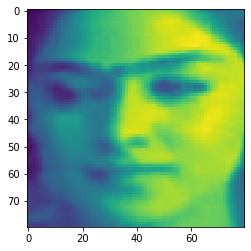

In [63]:
for i in features_test:
    test_image(i)

for i in labels_test:
    test_label(i)
    
print("Correct Predictions: ",compare(result_actual,result_predict), " %")

0.3211009174311927
[[ 34  25   0 105 112   6   0]
 [ 14  48   0 167 150  18   1]
 [  2  15   0  35  39   5   0]
 [ 25  54   0 417 252  27   6]
 [ 33  62   2 309 417  19   3]
 [ 14  21   3 146 140  26   1]
 [  5  23   0  76  80   3   3]]


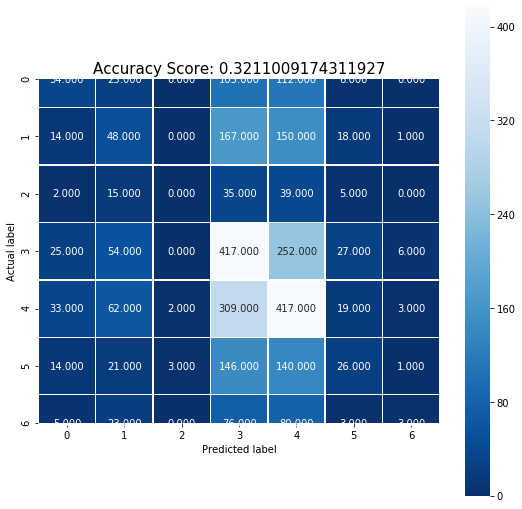

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Use score method to get accuracy of model
score = logisticRegr.score(features_test1, labels_test)
print(score)
cm = metrics.confusion_matrix(result_actual, result_predict)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);